In [8]:
import tpqoa

In [9]:
api = tpqoa.tpqoa('./pyalgo.cfg')

## Retrieving Historical Data

### Looking Up Instruments Available for Trading

In [10]:
api.get_instruments()[:15]

[('AUD/CAD', 'AUD_CAD'),
 ('AUD/CHF', 'AUD_CHF'),
 ('AUD/HKD', 'AUD_HKD'),
 ('AUD/JPY', 'AUD_JPY'),
 ('AUD/NZD', 'AUD_NZD'),
 ('AUD/SGD', 'AUD_SGD'),
 ('AUD/USD', 'AUD_USD'),
 ('Australia 200', 'AU200_AUD'),
 ('Brent Crude Oil', 'BCO_USD'),
 ('Bund', 'DE10YB_EUR'),
 ('CAD/CHF', 'CAD_CHF'),
 ('CAD/HKD', 'CAD_HKD'),
 ('CAD/JPY', 'CAD_JPY'),
 ('CAD/SGD', 'CAD_SGD'),
 ('CHF/HKD', 'CHF_HKD')]

### Backtesting a Momentum Strategy on Minute Bars

In [11]:
instrument = 'EUR_USD'
start = '2020-08-10'
end = '2020-08-12'
granularity = 'M1'
price = 'M'

In [12]:
data = api.get_history(instrument, start, end, granularity, price)
data

/home/mlopez/anaconda3/lib/python3.10/site-packages/v20/instrument.py:33: ResourceWarning: unclosed <ssl.SSLSocket fd=56, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.18.134.126', 32890), raddr=('104.18.34.254', 443)>
  super(Candlestick, self).__init__()


,o,h,l,c,volume,complete
time,,,,,,
2020-08-10 00:00:00,1.17814,1.17822,1.17814,1.17822,18,True
2020-08-10 00:01:00,1.17823,1.17841,1.17822,1.17836,32,True
2020-08-10 00:02:00,1.17834,1.17834,1.17826,1.17828,25,True
2020-08-10 00:03:00,1.17827,1.17834,1.17827,1.17834,13,True
2020-08-10 00:04:00,1.17836,1.17852,1.17836,1.17847,43,True
...,...,...,...,...,...,...
2020-08-11 23:55:00,1.17364,1.17371,1.17361,1.17366,22,True
2020-08-11 23:56:00,1.17364,1.17364,1.17361,1.17364,9,True
2020-08-11 23:57:00,1.17365,1.17366,1.17356,1.17357,11,True


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2814 entries, 2020-08-10 00:00:00 to 2020-08-11 23:59:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   o         2814 non-null   float64
 1   h         2814 non-null   float64
 2   l         2814 non-null   float64
 3   c         2814 non-null   float64
 4   volume    2814 non-null   int64  
 5   complete  2814 non-null   bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 134.7 KB


In [14]:
data[['c', 'volume']].head()

,c,volume
time,,
2020-08-10 00:00:00,1.17822,18
2020-08-10 00:01:00,1.17836,32
2020-08-10 00:02:00,1.17828,25
2020-08-10 00:03:00,1.17834,13
2020-08-10 00:04:00,1.17847,43


In [15]:
import numpy as np

In [16]:
data['returns'] = np.log(data['c'] / data['c'].shift(1))

In [17]:
cols = []
for momentum in [15, 30, 60, 120]:
    col = f'position_{momentum}'
    data[col] = np.sign(data['returns'].rolling(momentum).mean())
    cols.append(col)

In [18]:
from pylab import plt
plt.style.use('seaborn')
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

/tmp/ipykernel_22166/4037699656.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [19]:
strats = ['returns']

In [20]:
for col in cols:
    strat = 'strategy_{}'.format(col.split('_')[1])
    data[strat] = data[col].shift(1) * data['returns']
    strats.append(strat)

<Axes: xlabel='time'>

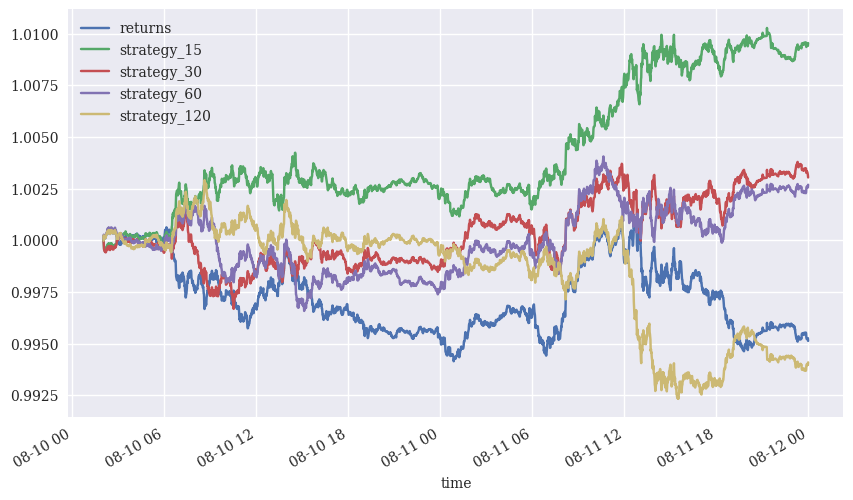

In [21]:
data[strats].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

### Factoring In Leverage and Margin

<Axes: xlabel='time'>

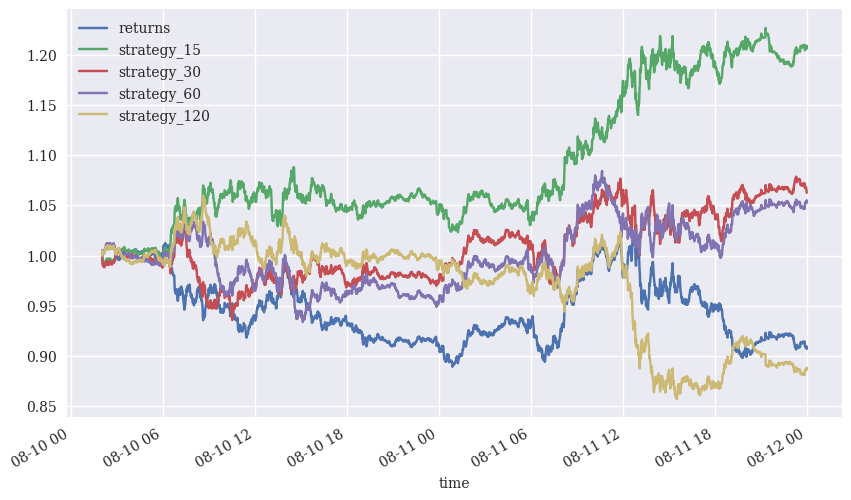

In [22]:
# leverage of 20:1
data[strats].dropna().cumsum().apply(lambda x: x * 20).apply(np.exp).plot(figsize=(10, 6))

## Working with Streaming Data

In [23]:
instrument = 'EUR_USD'

In [24]:
api.stream_data(instrument, stop=10)

2023-11-01T14:00:07.725418075Z 1.05526 1.05543
2023-11-01T14:00:08.023569412Z 1.05502 1.05524
2023-11-01T14:00:08.552776685Z 1.05502 1.05519
2023-11-01T14:00:08.854121581Z 1.05504 1.05524
2023-11-01T14:00:09.174350059Z 1.05499 1.05507
2023-11-01T14:00:09.715264915Z 1.05482 1.05499
2023-11-01T14:00:10.048307543Z 1.05476 1.05495
2023-11-01T14:00:10.318154583Z 1.05463 1.05474
2023-11-01T14:00:10.786141943Z 1.05453 1.05466
2023-11-01T14:00:11.119435145Z 1.0544 1.05453


## Placing Market Orders

In [25]:
api.create_order(instrument, 1000)



 {'id': '5', 'time': '2023-11-01T14:00:11.305389207Z', 'userID': 27068029, 'accountID': '101-004-27068029-001', 'batchID': '4', 'requestID': '79183075691217905', 'type': 'ORDER_FILL', 'orderID': '4', 'instrument': 'EUR_USD', 'units': '1000.0', 'gainQuoteHomeConversionFactor': '0.82041895465', 'lossQuoteHomeConversionFactor': '0.82866437128', 'price': 1.05446, 'fullVWAP': 1.05446, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 1.05438, 'liquidity': '1000000'}, {'price': 1.05436, 'liquidity': '2000000'}, {'price': 1.05435, 'liquidity': '2000000'}, {'price': 1.05433, 'liquidity': '5000000'}], 'asks': [{'price': 1.05446, 'liquidity': '1000000'}, {'price': 1.05449, 'liquidity': '2000000'}, {'price': 1.0545, 'liquidity': '2000000'}, {'price': 1.05451, 'liquidity': '5000000'}], 'closeoutBid': 1.05433, 'closeoutAsk': 1.05451}, 'reason': 'MARKET_ORDER', 'pl': '0.0', 'financing': '0.0', 'commission': '0.0', 'guaranteedExecutionFee': '0.0', 'accountBalance': '100000.0', 'tradeOpened': {'trad

In [26]:
api.create_order(instrument, -1500)



 {'id': '7', 'time': '2023-11-01T14:00:11.456374511Z', 'userID': 27068029, 'accountID': '101-004-27068029-001', 'batchID': '6', 'requestID': '79183075691218141', 'type': 'ORDER_FILL', 'orderID': '6', 'instrument': 'EUR_USD', 'units': '-1500.0', 'gainQuoteHomeConversionFactor': '0.820222823465', 'lossQuoteHomeConversionFactor': '0.828466268927', 'price': 1.05479, 'fullVWAP': 1.05479, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 1.05479, 'liquidity': '1000000'}, {'price': 1.05477, 'liquidity': '2000000'}, {'price': 1.05476, 'liquidity': '2000000'}, {'price': 1.05474, 'liquidity': '5000000'}], 'asks': [{'price': 1.05494, 'liquidity': '999000'}, {'price': 1.05497, 'liquidity': '2000000'}, {'price': 1.05498, 'liquidity': '2000000'}, {'price': 1.05499, 'liquidity': '5000000'}], 'closeoutBid': 1.05474, 'closeoutAsk': 1.05499}, 'reason': 'MARKET_ORDER', 'pl': '0.2707', 'financing': '0.0', 'commission': '0.0', 'guaranteedExecutionFee': '0.0', 'accountBalance': '100000.2707', 'tradeOpened

In [27]:
api.create_order(instrument, 500)



 {'id': '9', 'time': '2023-11-01T14:00:11.588466330Z', 'userID': 27068029, 'accountID': '101-004-27068029-001', 'batchID': '8', 'requestID': '79183075691218365', 'type': 'ORDER_FILL', 'orderID': '8', 'instrument': 'EUR_USD', 'units': '500.0', 'gainQuoteHomeConversionFactor': '0.819817338186', 'lossQuoteHomeConversionFactor': '0.828056708419', 'price': 1.05531, 'fullVWAP': 1.05531, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 1.05509, 'liquidity': '998500'}, {'price': 1.05507, 'liquidity': '2000000'}, {'price': 1.05506, 'liquidity': '2000000'}, {'price': 1.05504, 'liquidity': '5000000'}], 'asks': [{'price': 1.05531, 'liquidity': '999000'}, {'price': 1.05534, 'liquidity': '2000000'}, {'price': 1.05535, 'liquidity': '2000000'}, {'price': 1.05536, 'liquidity': '5000000'}], 'closeoutBid': 1.05504, 'closeoutAsk': 1.05536}, 'reason': 'MARKET_ORDER', 'pl': '-0.2153', 'financing': '0.0', 'commission': '0.0', 'guaranteedExecutionFee': '0.0', 'accountBalance': '100000.0554', 'tradesClosed'

## Implementing Trading Strategies in Real Time

In [28]:
import MomentumTrader as MT

In [29]:
mt = MT.MomentumTrader(
    './pyalgo.cfg',
    instrument=instrument,
    bar_length='10s',
    momentum=6,
    units=10000
)

In [30]:
mt.stream_data(mt.instrument, stop=500)

1 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


2 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


3 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


4 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


5 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


6 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


7 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


8 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


9 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


10 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


11 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


12 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


13 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


14 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


15 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


16 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


17 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


18 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


19 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


20 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


21 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


22 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


23 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


24 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


25 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


26 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


27 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


28 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


29 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


30 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


31 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


32 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


33 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


34 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


35 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


36 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


37 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


38 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


39 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


40 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


41 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


42 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


43 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


44 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


45 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


46 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


47 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


48 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


49 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


50 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


51 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


52 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


53 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


54 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


55 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


56 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


57 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


58 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


59 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


60 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


61 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


62 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


63 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


64 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


65 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


66 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


67 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


68 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


69 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


70 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


71 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


72 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


73 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


74 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


75 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


76 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


77 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


78 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


79 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


80 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


81 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


82 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


83 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


84 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


85 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


86 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


87 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


88 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


89 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


90 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


91 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


92 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


93 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


94 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


95 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


96 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


97 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


98 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


99 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


100 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


101 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


102 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


103 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


104 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


105 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


106 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


107 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


108 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


109 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


110 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


111 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


112 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


113 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


114 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


115 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


116 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


117 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


118 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


119 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


120 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


121 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


122 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


123 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


124 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


125 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


126 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


127 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


128 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


129 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


130 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


131 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


132 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


133 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


134 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


135 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


136 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


137 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


138 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


139 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


140 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


141 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


142 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


143 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


144 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


145 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


146 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


147 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


148 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


149 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


150 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


151 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


152 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


153 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


154 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


155 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


156 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


157 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


158 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


159 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


160 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


161 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


162 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


163 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


164 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


165 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


166 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


167 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


168 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


169 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


170 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


171 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


172 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


173 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


174 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


175 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


176 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


177 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


178 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


179 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


180 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


181 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


182 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


183 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


184 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


185 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


186 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(




 {'id': '11', 'time': '2023-11-01T14:01:30.690980077Z', 'userID': 27068029, 'accountID': '101-004-27068029-001', 'batchID': '10', 'requestID': '25139880496318393', 'type': 'ORDER_FILL', 'orderID': '10', 'instrument': 'EUR_USD', 'units': '-10000.0', 'gainQuoteHomeConversionFactor': '0.820723478968', 'lossQuoteHomeConversionFactor': '0.828971956144', 'price': 1.05424, 'fullVWAP': 1.05424, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 1.05424, 'liquidity': '1000000'}, {'price': 1.05422, 'liquidity': '2000000'}, {'price': 1.05421, 'liquidity': '2000000'}, {'price': 1.05419, 'liquidity': '5000000'}], 'asks': [{'price': 1.05435, 'liquidity': '1000000'}, {'price': 1.05438, 'liquidity': '2000000'}, {'price': 1.05439, 'liquidity': '2000000'}, {'price': 1.0544, 'liquidity': '5000000'}], 'closeoutBid': 1.05419, 'closeoutAsk': 1.0544}, 'reason': 'MARKET_ORDER', 'pl': '0.0', 'financing': '0.0', 'commission': '0.0', 'guaranteedExecutionFee': '0.0', 'accountBalance': '100000.0554', 'tradeOpened

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


188 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


189 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


190 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


191 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


192 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


193 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


194 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


195 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


196 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


197 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


198 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


199 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


200 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


201 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


202 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


203 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


204 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


205 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


206 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


207 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


208 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


209 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


210 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


211 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


212 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


213 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


214 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


215 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


216 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


217 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


218 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


219 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


220 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


221 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


222 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


223 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


224 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


225 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


226 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


227 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


228 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


229 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


230 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


231 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


232 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


233 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


234 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


235 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


236 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


237 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


238 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


239 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


240 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


241 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


242 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


243 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


244 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


245 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


246 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


247 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


248 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


249 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


250 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


251 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


252 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


253 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


254 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


255 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


256 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


257 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


258 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


259 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


260 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


261 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


262 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


263 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


264 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


265 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


266 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


267 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


268 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


269 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


270 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


271 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


272 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


273 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


274 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


275 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


276 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


277 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


278 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


279 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


280 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


281 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


282 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


283 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


284 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


285 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


286 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


287 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


288 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


289 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


290 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


291 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


292 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


293 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


294 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


295 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


296 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


297 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


298 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


299 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


300 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


301 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


302 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


303 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


304 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


305 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


306 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


307 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


308 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


309 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


310 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


311 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


312 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


313 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


314 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


315 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


316 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


317 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


318 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


319 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


320 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


321 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


322 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


323 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


324 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


325 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


326 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


327 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


328 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


329 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


330 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


331 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


332 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


333 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


334 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


335 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


336 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


337 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


338 

 {'id': '13', 'time': '2023-11-01T14:02:30.481943380Z', 'userID': 27068029, 'accountID': '101-004-27068029-001', 'batchID': '12', 'requestID': '25139880748082784', 'type': 'ORDER_FILL', 'orderID': '12', 'instrument': 'EUR_USD', 'units': '20000.0', 'gainQuoteHomeConversionFactor': '0.820459544835', 'lossQuoteHomeConversionFactor': '0.828705369406', 'price': 1.05455, 'fullVWAP': 1.05455, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 1.05445, 'liquidity': '1000000'}, {'price': 1.05443, 'liquidity': '2000000'}, {'price': 1.05442, 'liquidity': '2000000'}, {'price': 1.0544, 'liquidity': '5000000'}], 'asks': [{'price': 1.05455, 'liquidity': '1000000'}, {'price': 1.05458, 'liquidity': '2000000'}, {'price': 1.05459, 'liquidity': '2000000'}, {'price': 1.0546, 'liquidity': '5000000'}], 'closeoutBid': 1.0544, 'closeoutAsk': 1.0546}, 'reason': 'MARKET_ORDER', 'pl': '-2.569', 'financing': '0.0', 'commission': '0.0', 'guaranteedExecutionFee': '0.0', 'accountBalance': '99997.4864', 'tradeOpe

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


339 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


340 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


341 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


342 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


343 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


344 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


345 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


346 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


347 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


348 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


349 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


350 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


351 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


352 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


353 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


354 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


355 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


356 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


357 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


358 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


359 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


360 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


361 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


362 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


363 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


364 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


365 

 {'id': '15', 'time': '2023-11-01T14:02:40.602121979Z', 'userID': 27068029, 'accountID': '101-004-27068029-001', 'batchID': '14', 'requestID': '25139880790043769', 'type': 'ORDER_FILL', 'orderID': '14', 'instrument': 'EUR_USD', 'units': '-20000.0', 'gainQuoteHomeConversionFactor': '0.82057457329', 'lossQuoteHomeConversionFactor': '0.828821553926', 'price': 1.05427, 'fullVWAP': 1.05427, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 1.05427, 'liquidity': '1000000'}, {'price': 1.05425, 'liquidity': '2000000'}, {'price': 1.05424, 'liquidity': '2000000'}, {'price': 1.05422, 'liquidity': '5000000'}], 'asks': [{'price': 1.05436, 'liquidity': '1000000'}, {'price': 1.05439, 'liquidity': '2000000'}, {'price': 1.0544, 'liquidity': '2000000'}, {'price': 1.05441, 'liquidity': '5000000'}], 'closeoutBid': 1.05422, 'closeoutAsk': 1.05441}, 'reason': 'MARKET_ORDER', 'pl': '-2.3207', 'financing': '0.0', 'commission': '0.0', 'guaranteedExecutionFee': '0.0', 'accountBalance': '99995.1657', 'trad

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


366 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


367 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


368 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


369 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


370 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


371 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


372 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


373 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


374 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


375 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


376 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


377 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


378 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


379 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


380 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


381 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


382 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


383 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


384 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


385 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


386 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


387 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


388 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


389 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


390 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


391 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


392 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


393 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


394 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


395 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


396 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


397 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


398 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


399 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


400 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


401 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


402 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


403 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


404 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


405 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


406 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


407 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


408 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


409 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


410 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


411 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


412 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


413 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


414 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


415 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


416 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


417 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


418 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


419 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


420 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


421 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


422 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


423 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


424 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


425 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


426 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


427 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


428 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


429 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


430 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


431 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


432 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


433 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


434 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


435 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


436 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


437 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


438 

 {'id': '17', 'time': '2023-11-01T14:03:10.455316585Z', 'userID': 27068029, 'accountID': '101-004-27068029-001', 'batchID': '16', 'requestID': '25139880915927466', 'type': 'ORDER_FILL', 'orderID': '16', 'instrument': 'EUR_USD', 'units': '20000.0', 'gainQuoteHomeConversionFactor': '0.820314115803', 'lossQuoteHomeConversionFactor': '0.828558478776', 'price': 1.05456, 'fullVWAP': 1.05456, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 1.05446, 'liquidity': '1000000'}, {'price': 1.05444, 'liquidity': '2000000'}, {'price': 1.05443, 'liquidity': '2000000'}, {'price': 1.05441, 'liquidity': '5000000'}], 'asks': [{'price': 1.05456, 'liquidity': '1000000'}, {'price': 1.05459, 'liquidity': '2000000'}, {'price': 1.0546, 'liquidity': '2000000'}, {'price': 1.05461, 'liquidity': '5000000'}], 'closeoutBid': 1.05441, 'closeoutAsk': 1.05461}, 'reason': 'MARKET_ORDER', 'pl': '-2.4028', 'financing': '0.0', 'commission': '0.0', 'guaranteedExecutionFee': '0.0', 'accountBalance': '99992.7629', 'trad

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


439 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


440 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


441 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


442 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


443 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


444 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


445 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


446 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


447 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


448 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


449 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


450 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


451 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


452 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


453 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


454 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


455 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


456 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


457 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


458 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


459 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


460 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


461 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


462 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


463 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


464 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


465 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


466 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


467 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


468 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


469 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


470 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


471 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


472 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


473 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


474 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


475 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


476 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


477 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


478 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


479 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


480 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


481 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


482 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


483 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


484 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


485 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


486 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


487 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


488 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


489 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


490 

 {'id': '19', 'time': '2023-11-01T14:03:30.444813085Z', 'userID': 27068029, 'accountID': '101-004-27068029-001', 'batchID': '18', 'requestID': '25139880999849996', 'type': 'ORDER_FILL', 'orderID': '18', 'instrument': 'EUR_USD', 'units': '-20000.0', 'gainQuoteHomeConversionFactor': '0.820496755517', 'lossQuoteHomeConversionFactor': '0.828742954065', 'price': 1.05445, 'fullVWAP': 1.05445, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 1.05445, 'liquidity': '1000000'}, {'price': 1.05443, 'liquidity': '2000000'}, {'price': 1.05442, 'liquidity': '2000000'}, {'price': 1.0544, 'liquidity': '5000000'}], 'asks': [{'price': 1.05453, 'liquidity': '1000000'}, {'price': 1.05456, 'liquidity': '2000000'}, {'price': 1.05457, 'liquidity': '2000000'}, {'price': 1.05458, 'liquidity': '5000000'}], 'closeoutBid': 1.0544, 'closeoutAsk': 1.05458}, 'reason': 'MARKET_ORDER', 'pl': '-0.9116', 'financing': '0.0', 'commission': '0.0', 'guaranteedExecutionFee': '0.0', 'accountBalance': '99991.8513', 'trad

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


491 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


492 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


493 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


494 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


495 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


496 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


497 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


498 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


499 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


500 

/home/mlopez/dev/python-projects/quant-learning/python-for-algorithmic-trading/08-cfd-trading-with-oanda/MomentumTrader.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(


In [31]:
# close out the final position
oo = mt.create_order(instrument, units=-mt.position * mt.units,
                              ret=True, suppress=True)

## Retrieving Account Information 

In [32]:
api.get_account_summary()

{'id': '101-004-27068029-001',
 'alias': 'Primary',
 'currency': 'GBP',
 'balance': '99993.4926',
 'createdByUserID': 27068029,
 'createdTime': '2023-10-07T22:17:16.949066248Z',
 'guaranteedStopLossOrderMode': 'ALLOWED',
 'pl': '-6.5074',
 'resettablePL': '-6.5074',
 'resettablePLTime': '0',
 'financing': '0.0',
 'commission': '0.0',
 'guaranteedExecutionFees': '0.0',
 'marginRate': '0.03333333333333',
 'openTradeCount': 0,
 'openPositionCount': 0,
 'pendingOrderCount': 0,
 'hedgingEnabled': False,
 'unrealizedPL': '0.0',
 'NAV': '99993.4926',
 'marginUsed': '0.0',
 'marginAvailable': '99993.4926',
 'positionValue': '0.0',
 'marginCloseoutUnrealizedPL': '0.0',
 'marginCloseoutNAV': '99993.4926',
 'marginCloseoutMarginUsed': '0.0',
 'marginCloseoutPercent': '0.0',
 'marginCloseoutPositionValue': '0.0',
 'withdrawalLimit': '99993.4926',
 'marginCallMarginUsed': '0.0',
 'marginCallPercent': '0.0',
 'lastTransactionID': '21'}

In [33]:
api.get_transactions(tid=int(oo['id']) - 2)

[{'id': '20',
  'time': '2023-11-01T14:03:33.897254551Z',
  'userID': 27068029,
  'accountID': '101-004-27068029-001',
  'batchID': '20',
  'requestID': '25139881012439307',
  'type': 'MARKET_ORDER',
  'instrument': 'EUR_USD',
  'units': '10000.0',
  'timeInForce': 'FOK',
  'positionFill': 'DEFAULT',
  'reason': 'CLIENT_ORDER'},
 {'id': '21',
  'time': '2023-11-01T14:03:33.897254551Z',
  'userID': 27068029,
  'accountID': '101-004-27068029-001',
  'batchID': '20',
  'requestID': '25139881012439307',
  'type': 'ORDER_FILL',
  'orderID': '20',
  'instrument': 'EUR_USD',
  'units': '10000.0',
  'gainQuoteHomeConversionFactor': '0.820665939875',
  'lossQuoteHomeConversionFactor': '0.828913838768',
  'price': 1.05425,
  'fullVWAP': 1.05425,
  'fullPrice': {'type': 'PRICE',
   'bids': [{'price': 1.05416, 'liquidity': '980000'},
    {'price': 1.05414, 'liquidity': '2000000'},
    {'price': 1.05413, 'liquidity': '2000000'},
    {'price': 1.05411, 'liquidity': '5000000'}],
   'asks': [{'price':

In [34]:
api.get_transactions()

[{'id': '1',
  'time': '2023-10-07T22:17:16.949066248Z',
  'userID': 27068029,
  'accountID': '101-004-27068029-001',
  'batchID': '1',
  'requestID': '1772527600983438485',
  'type': 'CREATE',
  'divisionID': 4,
  'siteID': 101,
  'accountUserID': 27068029,
  'accountNumber': 1,
  'homeCurrency': 'GBP'},
 {'id': '2',
  'time': '2023-10-07T22:17:16.949066248Z',
  'userID': 27068029,
  'accountID': '101-004-27068029-001',
  'batchID': '1',
  'requestID': '1772527600983438485',
  'type': 'CLIENT_CONFIGURE',
  'alias': 'Primary',
  'marginRate': '0.03333333333333'},
 {'id': '3',
  'time': '2023-10-07T22:17:20.114036360Z',
  'userID': 27068029,
  'accountID': '101-004-27068029-001',
  'batchID': '3',
  'requestID': '1790541999509706562',
  'type': 'TRANSFER_FUNDS',
  'amount': '100000.0',
  'fundingReason': 'CLIENT_FUNDING',
  'accountBalance': '100000.0'},
 {'id': '4',
  'time': '2023-11-01T14:00:11.305389207Z',
  'userID': 27068029,
  'accountID': '101-004-27068029-001',
  'batchID': '4'